## Moduls to install 

In [1]:
# !pip install ipympl
# !pip install wget
# !pip install mitosheet
# !pip install pyjanitor
# !pip install pandas

## Import utilsLaris from github

In [87]:
import os
import wget
if os.path.isfile("utilsLaris.py")==True:
    os. remove("utilsLaris.py")
wget.download("https://raw.githubusercontent.com/Ah-essabar/LARIS01/master/utilsLaris.py")

'utilsLaris.py'

# Import useful packages

In [11]:
import janitor
import os
import glob
import mitosheet
import ipywidgets as widgets
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import utilsLaris
os.environ['NUMEXPR_MAX_THREADS'] = '16'
##############Initialisation parametres#########"
period = "5T"
prefixFiles = {"ElecS219" :"S219*.csv","ElecS114" :"S114*.csv", "Weather" :"WeatherFile*.txt"}
dirctory="./Data"
shelly_219 =  ['sensor_AA7BF5','sensor_AA4706', 'sensor_AA9130', 'sensor_483FDA81E0F4']
shelly_219 =  ['sensor_AA7BF5','sensor_AA4706', 'sensor_AA9130']
shelly_114 = ['sensor_AAC16E','sensor_AA7DBF' ,'sensor_AA8369']

# Ambiance data Importation

In [12]:
#utilsLaris.importData()

# Weather data

In [13]:
##  Merge multiple CSV Files into a single Pandas dataframe
################################################################################################################
# merging the files
########################################################wgetwget########################################################
# Data préparation for weatherData
################################################################################################################""
# use dayfirst = True to have correct date
weatherData = utilsLaris.mergeMultipleCSV_Files(dirctory = dirctory, prefixFile = prefixFiles["Weather"])
weatherData = utilsLaris.dataPreparationWeather(weatherData)

In [14]:
weatherData

,weather_out,weather_hum,weather_bar_,weather_rad_
date,,,,
2022-02-03 14:00:00,6.1,91.0,1019.700000,91.000000
2022-02-03 14:05:00,6.1,91.0,1019.683333,85.833333
2022-02-03 14:10:00,6.1,91.0,1019.666667,80.666667
2022-02-03 14:15:00,6.1,91.0,1019.650000,75.500000
2022-02-03 14:20:00,6.1,91.0,1019.633333,70.333333
...,...,...,...,...
2022-05-02 08:50:00,10.6,72.0,1019.100000,201.000000
2022-05-02 08:55:00,10.8,71.0,1019.100000,205.000000
2022-05-02 09:00:00,11.1,70.0,1019.200000,219.000000


# Electric data

In [15]:
# merge all files csv and do data préparation 
elecData_219 = utilsLaris.mergeMultipleCSV_Files(dirctory = dirctory, prefixFile = prefixFiles["ElecS219"])
elecData_114 = utilsLaris.mergeMultipleCSV_Files(dirctory = dirctory, prefixFile = prefixFiles["ElecS114"])
elecData_219 = utilsLaris.dataPreparationElec(elecData_219, period = period)
elecData_114 = utilsLaris.dataPreparationElec(elecData_114, period = period)

In [16]:
elecData_219

,elec_general_219_w,elec_eclairage_219_w
date,,
2022-02-01 00:00:00,273.3875,0.0
2022-02-01 00:05:00,284.7600,0.0
2022-02-01 00:10:00,285.5420,0.0
2022-02-01 00:15:00,279.1620,0.0
2022-02-01 00:20:00,286.4480,0.0
...,...,...
2022-05-04 09:35:00,325.8480,0.0
2022-05-04 09:40:00,317.1720,0.0
2022-05-04 09:45:00,325.1540,0.0


## Read data : Ambiance and windows

In [17]:
tab = utilsLaris.readData(period)
ResampledDict_s114 = tab[0]
ResampledDict_s219 = tab[1]
ResampledDict_shelly = tab[2]
ambianceData_114 = utilsLaris.dataFusionAmbiance(ResampledDict_s114, salle = 114)
ambianceData_219 = utilsLaris.dataFusionAmbiance(ResampledDict_s219, salle = 219)

In [18]:
ResampledDict_shelly['sensor_483FDA81E0F4']

,state_483FDA81E0F4
date,
2022-02-21 11:40:00,open
2022-02-21 11:45:00,open
2022-02-21 11:50:00,close
2022-02-21 11:55:00,close
2022-02-21 12:00:00,close
...,...
2022-04-13 14:20:00,close
2022-04-13 14:25:00,close
2022-04-13 14:30:00,close


# Data Fusion : All

In [19]:
dfs_219 = [ambianceData_219,elecData_219,weatherData]
dfs_114 = [ambianceData_114,elecData_114,weatherData]
df_219 = utilsLaris.dataFusionAll(dfs=dfs_219, shelly_sensors=shelly_219,ResampledDict_shelly=ResampledDict_shelly)
df_114 = utilsLaris.dataFusionAll(dfs=dfs_114, shelly_sensors=shelly_114,ResampledDict_shelly=ResampledDict_shelly)


In [20]:
df_219.to_csv("HandlingMissingData/df_219.csv")

In [30]:
df_219.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10839 entries, 2022-03-25 16:45:00 to 2022-05-02 07:55:00
Data columns (total 93 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   co2_100               10647 non-null  float64
 1   tvoc_100              10647 non-null  float64
 2   temperature_100       10647 non-null  float64
 3   humidity_100          10647 non-null  float64
 4   light_100             10647 non-null  float64
 5   sound_100             10647 non-null  float64
 6   co2_101               10648 non-null  float64
 7   tvoc_101              10648 non-null  float64
 8   temperature_101       10648 non-null  float64
 9   humidity_101          10648 non-null  float64
 10  light_101             10648 non-null  float64
 11  sound_101             10648 non-null  float64
 12  co2_102               10645 non-null  float64
 13  tvoc_102              10645 non-null  float64
 14  temperature_102       10645 non-nul

In [15]:
df_114.columns

Index(['co2_118', 'tvoc_118', 'temperature_118', 'humidity_118', 'light_118',
       'sound_118', 'co2_119', 'tvoc_119', 'temperature_119', 'humidity_119',
       'light_119', 'sound_119', 'co2_120', 'tvoc_120', 'temperature_120',
       'humidity_120', 'light_120', 'sound_120', 'co2_121', 'tvoc_121',
       'temperature_121', 'humidity_121', 'light_121', 'sound_121', 'co2_122',
       'tvoc_122', 'temperature_122', 'humidity_122', 'light_122', 'sound_122',
       'co2_123', 'tvoc_123', 'temperature_123', 'humidity_123', 'light_123',
       'sound_123', 'co2_124', 'tvoc_124', 'temperature_124', 'humidity_124',
       'light_124', 'sound_124', 'co2_125', 'tvoc_125', 'temperature_125',
       'humidity_125', 'light_125', 'sound_125', 'co2_126', 'tvoc_126',
       'temperature_126', 'humidity_126', 'light_126', 'sound_126', 'co2_127',
       'tvoc_127', 'temperature_127', 'humidity_127', 'light_127', 'sound_127',
       'co2_128', 'tvoc_128', 'temperature_128', 'humidity_128', 'light_128'

In [16]:
#ax = df1.iloc[100:2000,:].plot(figsize=(15, 6))
dataMaster = df_114.copy()
colonnesNames = utilsLaris.seperateGrandeurs(dataMaster, grandeurs=["temperature","co2","humidity","sound","tvoc", "light",  "elec","state", "weather"])
colonnesNames

{'temperature': ['temperature_118',
  'temperature_119',
  'temperature_120',
  'temperature_121',
  'temperature_122',
  'temperature_123',
  'temperature_124',
  'temperature_125',
  'temperature_126',
  'temperature_127',
  'temperature_128',
  'temperature_129'],
 'co2': ['co2_118',
  'co2_119',
  'co2_120',
  'co2_121',
  'co2_122',
  'co2_123',
  'co2_124',
  'co2_125',
  'co2_126',
  'co2_127',
  'co2_128',
  'co2_129'],
 'humidity': ['humidity_118',
  'humidity_119',
  'humidity_120',
  'humidity_121',
  'humidity_122',
  'humidity_123',
  'humidity_124',
  'humidity_125',
  'humidity_126',
  'humidity_127',
  'humidity_128',
  'humidity_129'],
 'sound': ['sound_118',
  'sound_119',
  'sound_120',
  'sound_121',
  'sound_122',
  'sound_123',
  'sound_124',
  'sound_125',
  'sound_126',
  'sound_127',
  'sound_128',
  'sound_129'],
 'tvoc': ['tvoc_118',
  'tvoc_119',
  'tvoc_120',
  'tvoc_121',
  'tvoc_122',
  'tvoc_123',
  'tvoc_124',
  'tvoc_125',
  'tvoc_126',
  'tvoc_127',
 

In [17]:
list(colonnesNames.keys())

['temperature',
 'co2',
 'humidity',
 'sound',
 'tvoc',
 'light',
 'elec',
 'state',
 'weather']

['weather_out', 'weather_hum', 'weather_bar_', 'weather_rad_']


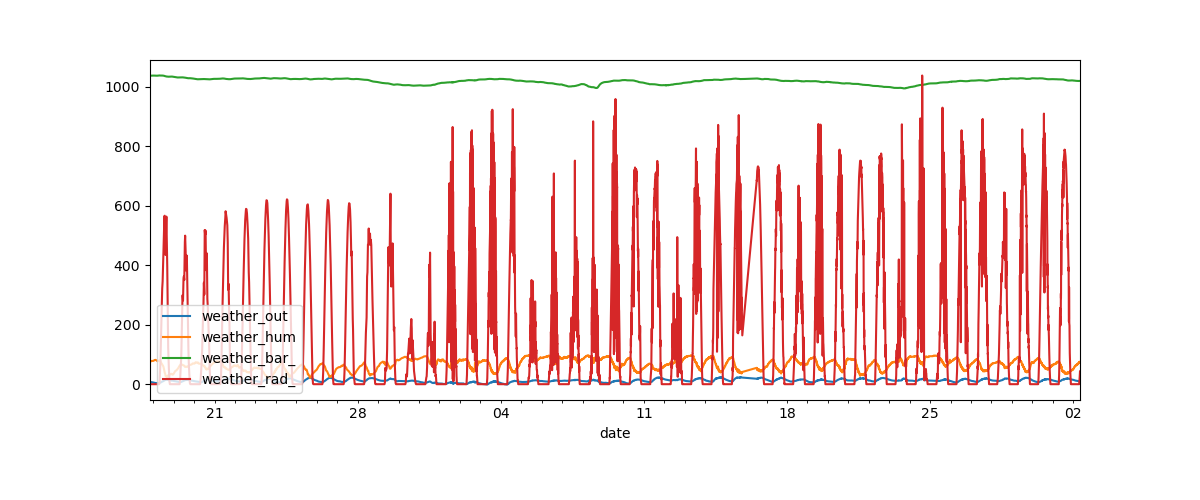

In [18]:
colonnesName = colonnesNames['weather']
print(colonnesName)
ax = dataMaster.loc[:,colonnesName].iloc[100:,:].plot(figsize=(12, 5)) 
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.legend(loc='lower left')
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()
plt.show()

In [19]:
colonnesNames
targets = ["co2", "temperature"]
resutilsLarist = [colonnesNames[key] for key in colonnesNames.keys() if key in targets]

In [ ]:
resutilsLarist

In [ ]:
from sklearn.ensemble import IsolationForest
X =x.iloc[:,0:]

clf = IsolationForest(random_state=0).fit(X)
y=clf.predict(X)

# Detect outliersset_index

In [ ]:
filt_df= df_114.copy()
low = .05
high = .95
quant_df = filt_df.quantile([low, high])
print(quant_df)


## deal with outliers?

In [ ]:
raw_data.drop(outliers, inplace = True)
print(len(raw_data))


In [ ]:
raw_data.drop(['id'], axis=1).head()

# Analyse measured data

In [ ]:
corr = df_114.corr()
corr
raw_data=df_114.copy()

sns.pairplot(sensor_100.drop(["id","date","room","sensor"],axis=1), hue="co2")

In [ ]:
# Verif bonne prise en compte des dates
i_value = "temperature"
fig, ax = plt.subplots(figsize=(20,10))
df1 = pd.Series(sensor_100[i_value+'_100'])[0:5000]
df2 = pd.Series(sensor_101[i_value+'_101'])[5000:10000]

ax1 = df1.plot(grid=True, label='100')
ax2 = df2.plot(grid=True, label='101')

plt.ylabel((i_value+" "+units[i]), fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title(i_value, fontsize=16)
    
ax.xaxis.set_minor_locator(hours)
ax.xaxis.set_minor_formatter(h_fmt)
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.get_xaxis().set_tick_params(which='major', pad=15) #major locator under minor
plt.legend(loc="upper left")

plt.show()

In [ ]:
print(sensor_100.shape, sensor_101.shape)

In [ ]:
sensor_103.id

In [ ]:
# fusion de des capteurs
sensor_100.sort_index(inplace=True)
sensor_101.sort_index(inplace=True)
sensor_101_ = sensor_100.copy()
sensor_100_ = sensor_100.copy()
print("before", sensor_100_.shape,sensor_101_.shape, sensor_100_.co2_100.isnutilsLarisl().sum())
sensor_100_ = sensor_100_.resample('5T').mean()
sensor_101_ = sensor_101_.resample('5T').mean()
print("After", sensor_100_.shape,sensor_101.shape, sensor_100_.co2_100.isnutilsLarisl().sum())
df_inner = sensor_100_.merge(sensor_101_, how='left', left_index=True, right_index=True)
df_inner.shape

In [ ]:
sensor_100_

In [ ]:
sensor_100_['2022-03-02'].co2.plot()

In [ ]:
import ipywidgets as widgets
%matplotlib widget
sensor_100_.loc['2022-02', 'co2'].resample('D').plot()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

import ipywidgets as widgets
%matplotlib widget

sensor_100_.loc['2022-03-02 11':'2022-03-02 15', 'co2'].resample('1.33H').plot()
plt.show()

In [ ]:
sensor_100.sort_index(inplace=True)
y=sensor_100.index
ydif=y[1:]-y[:-1]
ydif.min()

In [ ]:
ydif.max()
hawks = sensor_100_

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(
    data=hawks.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    mutilsLaristiple="fill",
    aspect=2.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [ ]:

ydif=y[1:]-y[:-1]
ydif.min()

In [ ]:
ydif.max()

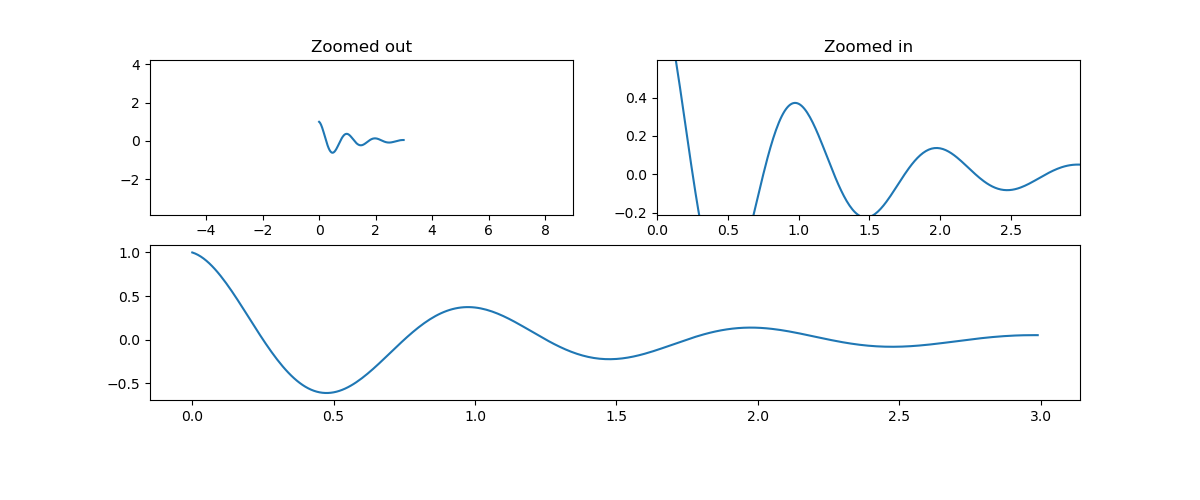

In [40]:
import numpy as np
import matplotlib.pyplot as plt


def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 3.0, 0.01)

ax1 = plt.subplot(212)
ax1.margins(0.05)           # DefautilsLarist margin is 0.05, value 0 means fit
ax1.plot(t1, f(t1))

ax2 = plt.subplot(221)
ax2.margins(2, 2)           # Values >0.0 zoom out
ax2.plot(t1, f(t1))
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(t1, f(t1))
ax3.set_title('Zoomed in')

plt.show()

In [ ]:
# Importing
import sklearn
import pandas as pd 
# Load the dataset
bos_hou = raw_data.copy() 
# Create the dataframe
column_name = bos_hou.columns
df_boston = bos_hou
df_boston.columns = column_name
print(df_boston.head())
 
''' Detection '''
# IQR
Q1 = np.percentile(df_boston['co2'], 5,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_boston['co2'], 95,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_boston.shape)
 
# Upper bound
upper = np.where(df_boston['co2'] >= (Q3+5*IQR))
# Lower bound
lower = np.where(df_boston['co2'] <= (Q1-2*IQR))
 
''' Removing the Outliers '''
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)
 
print("New Shape: ", df_boston.shape)

In [ ]:
df_boston.max()

In [ ]:
#!pip list

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(ambianceData_219)

X_test = ambianceData_219
# the model learns that the second feature is double the first
a = np.round(imp.transform(X_test))